In [1]:
import datetime as dt
import pandas as pd

from copy import deepcopy

C:\Users\micha\AppData\Local\Temp\ipykernel_27700\2975876000.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import Data

In [2]:
dfa = pd.read_csv('a.csv')
dfb = pd.read_csv('b.csv')
dfc = pd.read_csv('c.csv')

C:\Users\micha\AppData\Local\Temp\ipykernel_27700\3990110915.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfa = pd.read_csv('a.csv')


### Data Cleaning

In [3]:
def strip_df(df):
    '''
    Given a df, return a copy of the dataframe
    with whitespace removed from the front and back 
    of each entry.
    '''
    df_copy = deepcopy(df)
    
    for col_name in list(df.columns):
        if df_copy[col_name].dtype == 'object':
            df_copy[col_name] = df_copy[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x)
    
    return df_copy

In [4]:
dfa_cleaned = strip_df(dfa)
dfb_cleaned = strip_df(dfb)
dfc_cleaned = strip_df(dfc)

###### Sometimes, you might need to join data sources together in order to apply a relevant filter, or to get data in your desired format. 

In [5]:
dfa_vce_joined = dfa_cleaned.set_index('arr_stn').join(dfc_cleaned.set_index('STN_CD'))

###### Flight Op Filtering

In [6]:
df_flt_cabin = dfa_cleaned[(dfa_cleaned.CAB_OR_CLS_CD == 'CAB')
                & (dfa_cleaned.dep_stn == 'LCY') 
                & (dfa_cleaned.arr_stn == 'VCE')
                & (dfa_cleaned.flt_no == 1472)
                & (dfa_cleaned.dep_dt == '2021-12-28')
                & (dfa_cleaned.cabin == 'M')]

In [7]:
df_flt_class = dfa_cleaned[(dfa_cleaned.CAB_OR_CLS_CD == 'CLS')
                & (dfa_cleaned.dep_stn == 'LCY') 
                & (dfa_cleaned.arr_stn == 'VCE')
                & (dfa_cleaned.flt_no == 1472)
                & (dfa_cleaned.dep_dt == '2021-12-28')
                & (dfa_cleaned.cabin == 'M')
                & (dfa_cleaned.class_code == 'B')
                & (dfa_cleaned.pos == 'GB')]

In [8]:
df_flt_cabin = df_flt_cabin.sort_values(by=['snapshot_dt'])

In [9]:
df_flt_class = df_flt_class.sort_values(by=['snapshot_dt'])

### Data Visualisation

In [10]:
import matplotlib
# set size of graphs
matplotlib.rcParams['figure.figsize'] = (12, 8)
import matplotlib.pyplot as plt

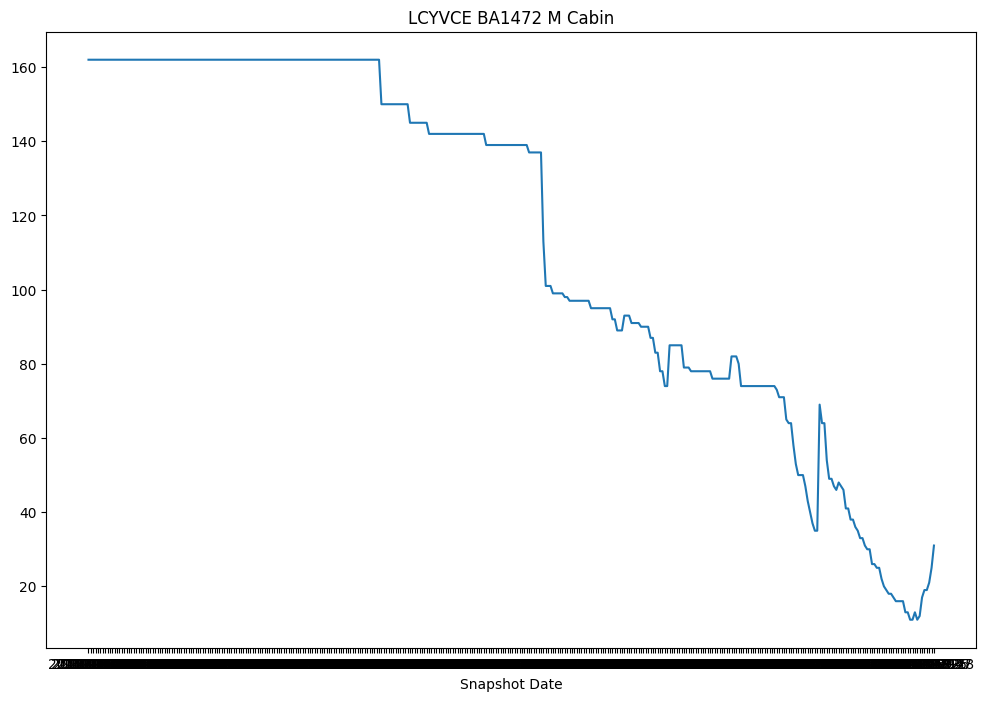

In [11]:
plt.plot(df_flt_cabin['snapshot_dt'], df_flt_cabin['availability'])
#plt.plot(df_flt_cabin['snapshot_dt'], df_flt_cabin['capacity'])
#plt.plot(df_flt_cabin['snapshot_dt'], df_flt_cabin['seats_sold'])
plt.xlabel('Snapshot Date')
#plt.ylabel('ylabel')
plt.title('LCYVCE BA1472 M Cabin')
plt.show()

### Pricing

In [13]:
df_flt_cabin_price_m = dfb_cleaned[(dfb_cleaned.dep_stn == 'LCY') 
                & (dfb_cleaned.arr_stn == 'GIG')
                & (dfb_cleaned.flt_no == 473)
                & (dfb_cleaned.dep_dt == '2021-12-02')
                & (dfb_cleaned.cabin == 'M')]


df_flt_cabin_price_j = dfb_cleaned[(dfb_cleaned.dep_stn == 'LCY') 
                & (dfb_cleaned.arr_stn == 'GIG')
                & (dfb_cleaned.flt_no == 473)
                & (dfb_cleaned.dep_dt == '2021-12-02')
                & (dfb_cleaned.cabin == 'J')]

df_flt_cabin_price_f = dfb_cleaned[(dfb_cleaned.dep_stn == 'LCY') 
                & (dfb_cleaned.arr_stn == 'GIG')
                & (dfb_cleaned.flt_no == 473)
                & (dfb_cleaned.dep_dt == '2021-12-02')
                & (dfb_cleaned.cabin == 'F')]

df_flt_cabin_price_m = df_flt_cabin_price_m.sort_values(by=["snapshot_dt"])
df_flt_cabin_price_j = df_flt_cabin_price_j.sort_values(by=["snapshot_dt"])
df_flt_cabin_price_f = df_flt_cabin_price_f.sort_values(by=["snapshot_dt"])

In [14]:
df_flt_cabin_price_m.cabin.unique()

array(['M'], dtype=object)

In [21]:
import numpy as np

In [18]:
#plt.plot(df_flt_cabin_price_m['snapshot_dt'], df_flt_cabin_price_m['lop'])
#df_flt_cabin_price_m['snapshot_dt'] = df_flt_cabin_price_m['snapshot_dt'].astype("object")
df_flt_cabin_price_m['dep_dt'] = pd.to_datetime(df_flt_cabin_price_m['dep_dt'])
df_flt_cabin_price_m['snapshot_dt'] = pd.to_datetime(df_flt_cabin_price_m['snapshot_dt'])

df_flt_cabin_price_m["days_to_departure"] = df_flt_cabin_price_m.apply(lambda x: (x["dep_dt"] - x["snapshot_dt"]).days, axis=1)

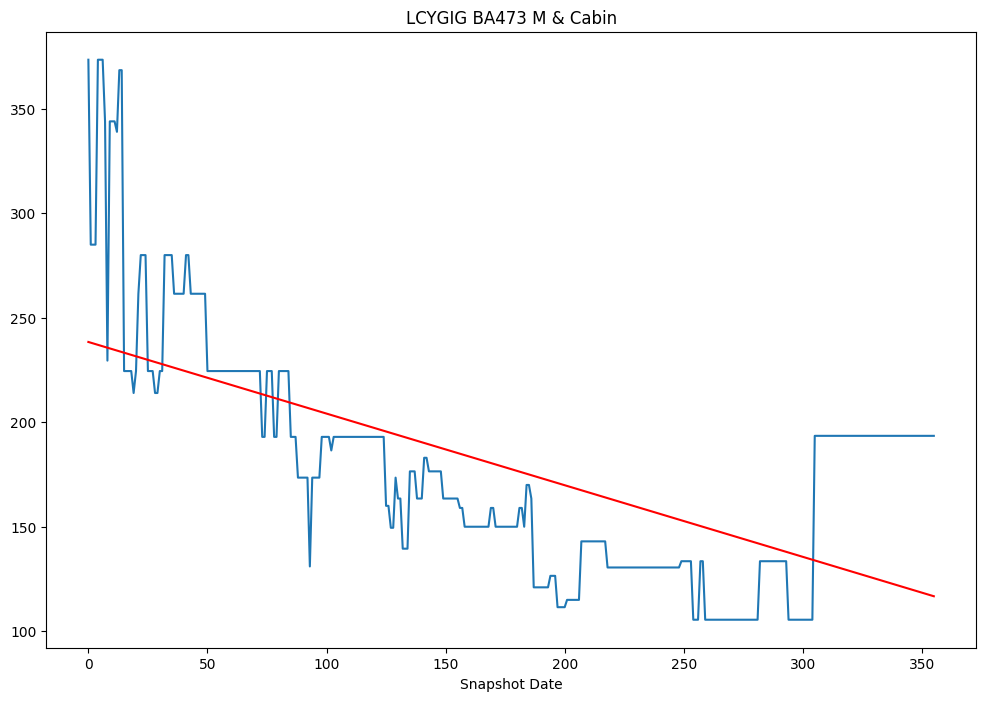

In [23]:
#plt.plot(df_flt_cabin_price_m['snapshot_dt'], df_flt_cabin_price_m['lop'])
#df_flt_cabin_price_m['snapshot_dt'] = df_flt_cabin_price_m['snapshot_dt'].astype("object")
df_flt_cabin_price_m['dep_dt'] = pd.to_datetime(df_flt_cabin_price_m['dep_dt'])
df_flt_cabin_price_m['snapshot_dt'] = pd.to_datetime(df_flt_cabin_price_m['snapshot_dt'])

df_flt_cabin_price_m["days_to_departure"] = df_flt_cabin_price_m.apply(lambda x: (x["dep_dt"] - x["snapshot_dt"]).days, axis=1)

df_flt_cabin_price_m['lop'] = df_flt_cabin_price_m['lop'].astype('float')

df_flt_cabin_price_m.sort_values(by="days_to_departure", inplace=True)
x = df_flt_cabin_price_m['days_to_departure']
y = df_flt_cabin_price_m['lop']
plt.plot(x, y)
#plt.plot(df_flt_cabin_price_j['snapshot_dt'], df_flt_cabin_price_j['lop'])
#plt.plot(df_flt_cabin_price_f['snapshot_dt'], df_flt_cabin_price_f['lop'])
#plt.plot(df_flt_cabin_price['snapshot_dt'], df_flt_cabin_price['capacity'])
#plt.plot(df_flt_cabin['snapshot_dt'], df_flt_cabin['seats_sold'])

coef = np.polyfit(df_flt_cabin_price_m['days_to_departure'], df_flt_cabin_price_m['lop'], deg=1)
polynomial = np.poly1d(coef)


x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)

# Plot the polynomial curve
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial fit (degree {1})')


plt.xlabel('Snapshot Date')
#plt.ylabel('ylabel')
plt.title('LCYGIG BA473 M & Cabin')
plt.show()

In [67]:
dfb_cleaned.head()

,snapshot_dt,dep_stn,arr_stn,flt_no,dep_dt,unit_cd,cabin,loc,STN_POC_CD,lop
0,2021-01-06,LCY,GRU,744,2021-12-27,BAW,M,M,STN1,298.5
1,2021-04-16,LCY,CGH,484,2021-12-30,BAW,J,I,STN1,1059.5
2,2021-04-06,LCY,NAP,161,2021-12-11,BAW,C,I,STN1,86.0
3,2021-02-05,LCY,MXP,817,2021-12-20,BAW,M,M,STN1,177.5
4,2021-05-31,LCY,NAP,1139,2021-12-24,BAW,C,I,STN1,276.0


In [ ]:
# # Example plot
# xs = [1, 2, 3, 4, 5]
# ys = [10, 20, 30, 40, 50]

# plt.plot(xs, ys)
# plt.xlabel('xlabel')
# plt.ylabel('ylabel')
# plt.title('title')
# plt.show()

In [ ]:
# # Example multi-line plot
# zs = [2, 3, 4, 5, 6]
# ws = [10, 20, 30, 40, 50]

# xs = [1, 2, 3, 4, 5]
# ys = [10, 20, 30, 40, 50]

# # plot both sets of data above
# plt.plot(xs, ys)
# plt.plot(zs, ws)
# plt.xlabel('xlabel')
# plt.ylabel('ylabel')
# plt.title('title')
# plt.show()

### Modelling

###### Errors

In [ ]:
def mean_abs_error(xs, ys, model):
    '''
    Given the actual x and y values of your data, 
    as well as a function representing your model,
    calculate the Mean Absolute Error on this dataset, 
    and return the error value.
    '''
    
    return None

In [ ]:
def mean_sq_error(xs, ys, model):
    '''
    Given the actual x and y values of your data, 
    as well as a function representing your model,
    calculate the Mean Squared Error on this dataset, 
    and return the error value.
    '''
    return None

###### Models

### Forecasting

In [ ]:
# day to departure: number of bookings
bkg_profile = {300:1, 283:2, 233:1, 189:4, 160:1, 101:3, 68:3,
                 64:1, 63:1, 62:1, 59:1, 58:1, 56:1, 54:3, 50:6,
                 49:1, 48:2, 46:2, 43:1, 39:1, 38:4, 37:3, 35:2,
                 33:4, 32:3, 31:1, 28:1, 26:1, 20:1,19:4,18:5,
                 17:3,16:2,15:4,14:2,13:1,12:5,10:3,9:1,8:3,7:1,
                 6:3,5:6,4:3,3:1,2:2,1:3}

In [ ]:
# use your models to estimate the revenue from
# the above booking profile.
total_revenue = None